In [2]:
import pandas as pd

In [4]:
fish = pd.read_csv('Fish.csv')
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [12]:
print('The different fish species we have are :', fish['Species'].unique())

The different fish species we have are : ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [142]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
fish["Species"]=label_encoder.fit_transform(fish["Species"])
fish["Species"].unique()

array([0, 4, 6, 1, 2, 3, 5], dtype=int64)

In [118]:
fish.isnull().sum()
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [119]:
correlation = fish.corr()
correlation

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.312960,-0.266696,-0.283601,-0.335519,-0.698193,-0.397578
Weight,-0.312960,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.266696,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.283601,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.335519,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.698193,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.397578,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

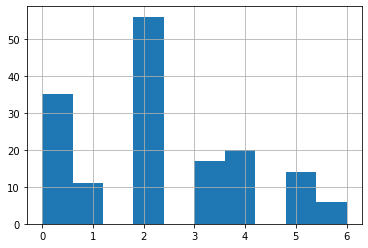

In [120]:
fish['Species'].hist()

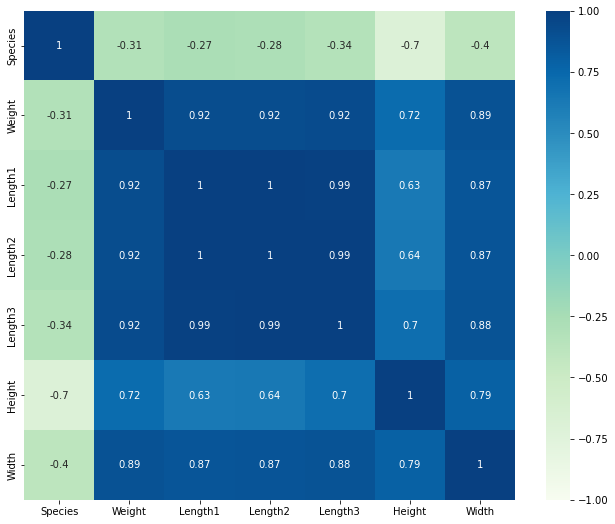

In [121]:
# check for multiconearity
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(11,9))
sns.heatmap(fish.corr(),
            vmin = -1,
            vmax = 1,
            cmap = 'GnBu',
            annot = True)
plt.show()

In [123]:
X = fish.drop('Species', axis = 1)
y = fish['Species']

X

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 365)

In [126]:
#preprocess the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [128]:
print('Linear Regression coefficent are : ', lr.coef_)
print('Linear Regression intercept is : ', lr.intercept_)

Linear Regression coefficent are :  [  0.94397965  12.59039057 -21.81443144   8.37267499  -2.89307743
   1.59640823]
Linear Regression intercept is :  2.2972972972973174


In [129]:
y_pred = lr.predict(X_test)
y_pred

array([ 1.82281912,  3.42430753,  2.25208294,  2.33972214,  2.13734919,
        4.41068388,  2.62475686,  2.48960605,  2.5549609 ,  2.22966266,
        3.55323168,  0.84332859,  1.19972195,  2.39636202,  4.91289386,
        0.63444721,  3.56544826,  0.85943069,  3.84230081,  0.24581281,
        4.08604499,  3.9043321 ,  2.58568799,  2.60028556,  3.74409273,
        0.26022688,  0.20693373, -0.36346778,  2.67188813,  1.76347787,
       -0.56382455,  2.33162293,  3.07393724,  2.50063927,  2.86056341,
        2.30811159,  2.69098606,  3.20125383,  1.94190659, -0.66728139,
        1.59481922,  0.54517093,  1.91509225,  2.2941722 ,  2.56116601,
        2.79369675,  2.15991044,  2.16959691])

In [140]:
import numpy as np
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
96,2,1.822819
42,4,3.424308
122,2,2.252083
133,3,2.339722
57,6,2.137349
153,5,4.410684
137,3,2.624757
121,2,2.489606
98,2,2.554961
79,2,2.229663


In [135]:
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

In [136]:
rmse

1.0643646292245639

In [137]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [138]:
r2

0.5794848984488856